### **データ分析**

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000

#### ■目的変数の分析

In [2]:
data = pd.read_pickle(os.path.join('data',"sales_train_val.pickle"))
data.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,day,item_cnt
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


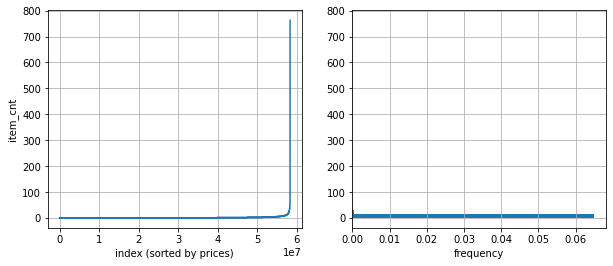

In [21]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
ax.plot(data["item_cnt"].dropna().sort_values().values)
ax.grid(True)
ax.set_ylabel("item_cnt")
ax.set_xlabel("index (sorted by item_cnt its-self)")

ax2 = fig.add_subplot(1,2,2)
ax2.hist(data["item_cnt"].dropna(),bins=50,density=True,orientation="horizontal")
ax2.set_xlabel("frequency")
ax2.grid(True)
plt.show()

- 売れている個数は最大でも800個で, 特別異常な値は見当たらない.
- ほとんどが0であり, ごくまれに100以上売れているものがある.

#### ■価格の分析

In [5]:
sell_prices = pd.read_csv(os.path.join("rawdata","sell_prices.csv"))
sell_prices.head(5)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


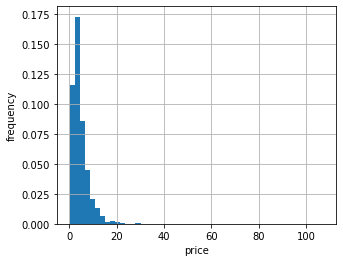

In [23]:
fig = plt.figure(figsize=(5,4))

ax = fig.add_subplot(1,1,1)
ax.hist(sell_prices["sell_price"].dropna().sort_values().values,bins=50,density=True)
ax.grid(True)
ax.set_ylabel("frequency")
ax.set_xlabel("price")

plt.show()

In [6]:
cnt = data.groupby(by=["store_id","item_id"]).agg({"item_cnt":["median","mean","max","min"]})
cnt = cnt.reset_index()
cnt.columns = ["store_id","item_id","item_cnt-median","item_cnt-mean","item_cnt-max","item_cnt-min"]

tmp = pd.merge(sell_prices[["store_id","item_id","sell_price"]],
               cnt,
               on=["store_id","item_id"],
               how="left")
tmp = tmp[["item_cnt-median","item_cnt-mean","item_cnt-max","item_cnt-min","sell_price"]]

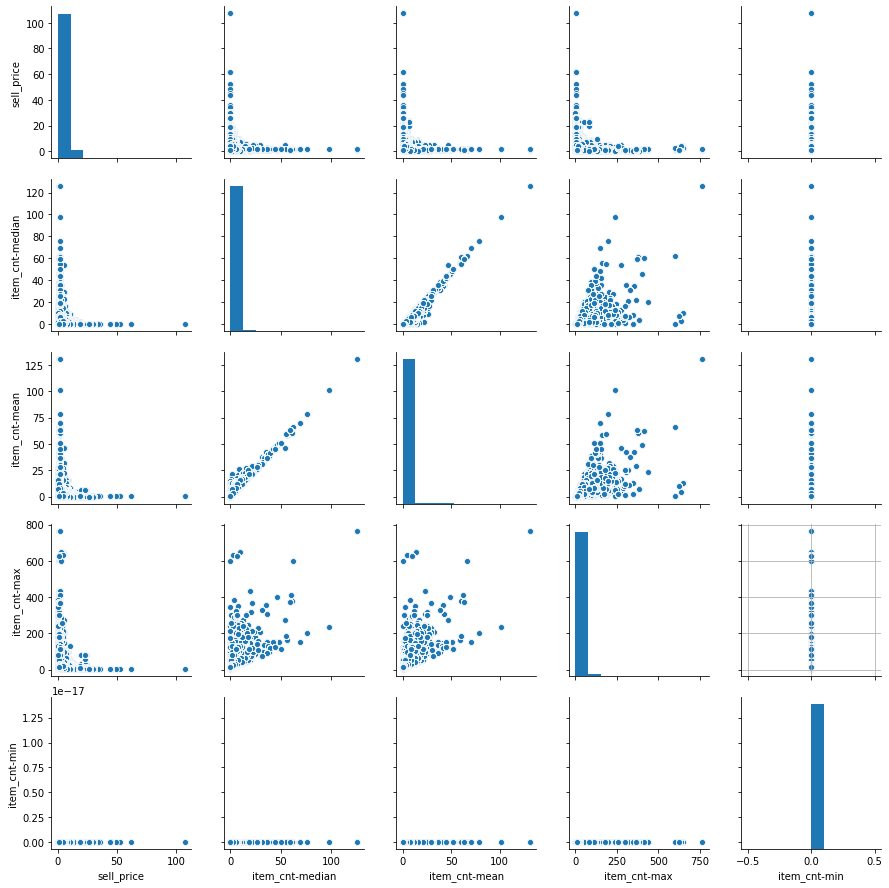

In [49]:
import seaborn as sn

sn.pairplot(tmp)
plt.grid(True)
plt.show()

- sell_priceが高いと売れる個数が少ない, 逆もしかり.
- sell_priceとitem_cntには反比例の関係があるので, sell_priceの逆数で線形回帰やるとうまくいきそう.

次に, すべての変数が指数分布に従ってそうなので, 対数スケールで見てみる. (0が多いのでゲタをはかせてログとる)

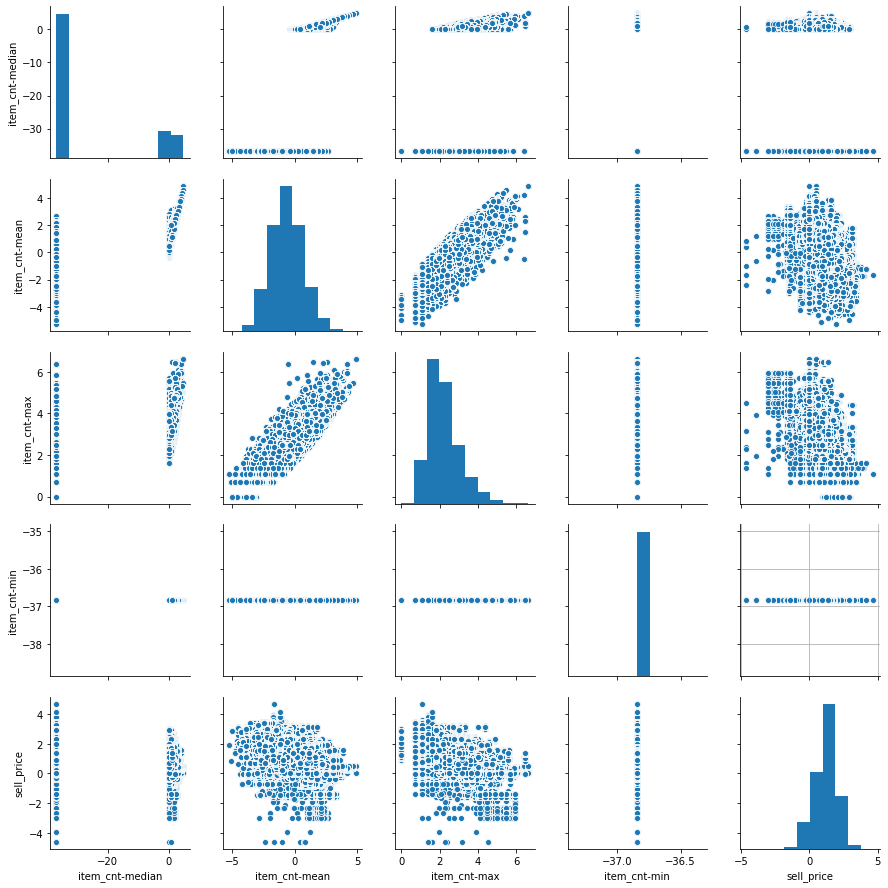

In [10]:
import seaborn as sn

sn.pairplot(np.log(tmp+1e-16))
plt.grid(True)
plt.show()

0が多い変数なので, プロットが不安定に... これは使えない. 